1. Определить 3 поста с самой сильной и 3 поста с самой слабой мерой связи окраса поста с окрасом его комментариев. Обосновать методику расчета силы связи.

2. Определить топ 10 биграмм в постах и топ 10 биграмм в комментариях.

3. Построить прогноз суммарного количества просмотров постов по дням на 1 месяц вперед. Оценить качество прогнозной модели.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns             # statistical data visualization
#from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./tslec'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
comment_df = pd.read_excel(open('2022-05-06_19_17_37.xlsx', 'rb'),
              sheet_name='Comments', skiprows=[0])#, index_col='Дата')  

In [3]:
comment_df.head(10)
#!pip install jupyterthemes
#!pip install nltk
#!pip install pymystem3
#!pip install clean-text
#!pip install pymorphy2
#!pip install wordcloud
#!pip install statsmodels

,Социальная сеть,ID поста,ID комментария,Владелец,ID Владелеца,Текст,Эмоциональный окрас,Дата,Лайков
0,Вконтакте,-115807015_2334,5412482_2336,Валентин Точилкин,5412482,Задумка понравилась! Думаю будет смотреться лу...,Нейтральность,2021-12-31 08:19:05,1
1,Вконтакте,-30666517_1774956,308730199_1774960,Денис Гончаров,308730199,Вам тоже здоровья и удачи в прошлом и крепкого...,Вежливость,2021-12-31 07:09:40,9
2,Вконтакте,-30666517_1774956,10784303_1774979,Олег Кирин,10784303,Полагаю: Вера и Надежда – это тимлид и прожект...,Юмор,2021-12-31 09:20:39,4
3,Вконтакте,-30666517_1774956,586953361_1775092,Замбек Замбеков,586953361,этот интеллект на али давно существует,Нейтральность,2021-12-31 20:38:00,1
4,Вконтакте,-30666517_1774956,19496621_1775350,Александр Бирабиджанов,19496621,Будет вечный Свет.,Нейтральность,2022-01-03 00:04:52,1
5,Вконтакте,-54530371_346101,600835500_346102,Юйи Ивнв,600835500,Сальвадор Дали так картины писал👀,Нейтральность,2021-12-30 19:24:41,2
6,Вконтакте,-54530371_346101,196686339_346105,Сергей Семёнов,196686339,(949119 → 4) тут должно быть 1 вместо 4 или я ...,Нейтральность,2021-12-30 19:54:19,1
7,Вконтакте,-54530371_346101,5732229_346108,Алексей Леонов,5732229,Чот ничего не понял. Пояснительная бригада в п...,Нейтральность,2021-12-30 20:41:21,2
8,Вконтакте,-54530371_346101,25013697_346109,Андрей Селезнёв,25013697,Как бы ответ в этой задаче сразу в условии даё...,Юмор,2021-12-30 20:45:09,0
9,Вконтакте,-54530371_346101,196686339_346110,Сергей Семёнов,196686339,"Не, я все-таки решил заморочиться и найти этот...",Негатив,2021-12-30 20:58:34,2


In [4]:
report_df = pd.read_excel(open('2022-05-06_19_17_37.xlsx', 'rb'),
              sheet_name='Report', skiprows=[0])  

In [5]:
report_df.head()

,Социальная сеть,ID поста,Владелец,Текст,Эмоциональный окрас,Дата,Комментариев,Лайков,Репостов,Просмотров,Негативных комментариев,Позитивных комментариев,Нейтральных комментариев,Неопределенных комментариев,Вежливых комментариев,Юмористических комментариев
0,Вконтакте,-159668210_25795,FSOCIETY | IT - сообщество,Нам задают много вопросов о технологическом ко...,Нейтральность,2021-12-31 07:45:00,0,0,0,3548.0,0,0,0,0,0,0
1,Вконтакте,-74188185_20318,dev.by,В высадке на Марс бизнесмен видит возможность ...,Нейтральность,2021-12-31 07:41:31,0,2,0,346.0,0,0,0,0,0,0
2,Вконтакте,-74188185_20317,dev.by,Гораздо чаще остальных американские компании и...,Нейтральность,2021-12-31 07:40:42,0,0,0,319.0,0,0,0,0,0,0
3,Вконтакте,-21732035_11926,Информационная безопасность - Anti-Malware.ru,"Twitter-аккаунт, который ранее связывали с защ...",Негатив,2021-12-31 07:23:16,0,2,0,222.0,0,0,0,0,0,0
4,Вконтакте,-718901_3742,EPAM Belarus,Дорогие коллеги и друзья! \n⠀ \nСпасибо за ваш...,Позитив,2021-12-31 07:13:35,0,37,2,3956.0,0,0,0,0,0,0


C:\Users\Egor\AppData\Local\Temp\ipykernel_21164\542574111.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = np.triu(report_df.corr())
C:\Users\Egor\AppData\Local\Temp\ipykernel_21164\542574111.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(report_df.corr(), annot = True, fmt='.1g', mask=matrix)


<Axes: >

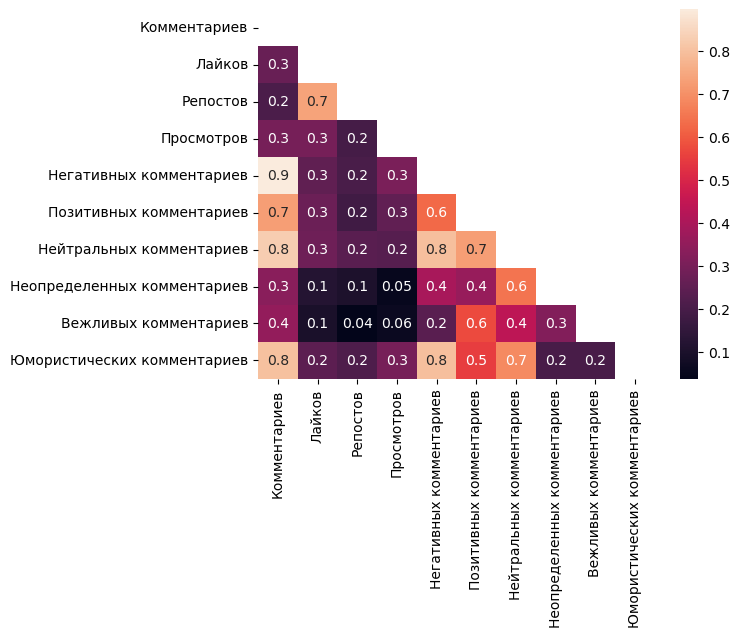

In [6]:
matrix = np.triu(report_df.corr())
sns.heatmap(report_df.corr(), annot = True, fmt='.1g', mask=matrix)

In [7]:
comment = comment_df[['ID поста', 'Эмоциональный окрас']]
report = report_df[['ID поста', 'Эмоциональный окрас']]
ids = report['ID поста']
def getPostsData(posts_df):
  for index, row in report_df.iterrows():
      id = row['ID поста']
      views = row['Просмотров']
      date = row['Дата']
      self_emotion = row['Эмоциональный окрас']
      org_text = row['Текст']
      positive = row['Позитивных комментариев']
      negative = row['Негативных комментариев']
      neutral = row['Нейтральных комментариев']
      uncertain = row['Неопределенных комментариев']
      polite = row['Вежливых комментариев']
      humor = row['Юмористических комментариев']
      likes = row['Лайков']
      reposts = row['Репостов']
      self_count = 0
      sum = positive + negative + neutral + uncertain + polite + humor
      percentage = 0
      others_sum = 0
      if sum != 0:
        if self_emotion == 'Позитив':
          percentage = (positive / sum) * 100
          self_count = positive
          others_sum = negative + neutral + uncertain + polite + humor
        if self_emotion == 'Нейтральность':
          percentage = (neutral / sum) * 100
          self_count = neutral
          others_sum = positive + negative + uncertain + polite + humor
        if self_emotion == 'Негатив':
          percentage = (negative / sum) * 100
          self_count = negative
          others_sum = positive + neutral + uncertain + polite + humor
        if self_emotion == 'Вежливость':
          percentage = (polite / sum) * 100
          self_count = polite
          others_sum = positive + neutral + uncertain + negative + humor
        if self_emotion == 'Неопределенность':
          percentage = (uncertain / sum) * 100
          self_count = uncertain
          others_sum = positive + neutral + negative + negative + humor
        if self_emotion == 'Юмор':
          percentage = (humor / sum) * 100
          self_count = humor
          others_sum = positive + neutral + uncertain + negative + negative
        post_data = [[id, self_emotion, views, date, org_text, positive, negative, neutral, uncertain, polite, humor, self_count, others_sum, sum, likes, reposts]]
      
        df2 = pd.DataFrame(post_data, columns=['ID поста','Окрас','Просмотров','Дата','Текст','Позитивных', 
                                                    'Негативных', 'Нейтральных', 'Неопределённых',
                                                    'Вежливых', 'Юмористических', 'Количество таких же', 'Сумма других', 
                                                    'Общая сумма','Лайков','Репостов'])
      
        posts_df = pd.concat([posts_df, df2])
  return posts_df

In [8]:
df = pd.DataFrame()
tmp = getPostsData(df)

По моему мнению количество лайков и репостов и просмотров менее значимы. Более важными характеристиками являются число комментариев. Присвоим веса таким образом, чтобы итоговый коэффициент варьировался от 0  до 1.
Также я пробовал  нормализовать только число просмотров от 0 до 1 методом MinMaxScaler. Игнорируем возраст поста и не пересчитываем коэффициенты более свежим постам, т.к. все данные архивные и свой максимум они уже выбрали в первые недели после публикации. Оценка ведётся по разнице постов с совпадающей окраской поста и отличной от неё, а нормированный коэффициент просмотров выступает в качестве корректирующего вес множителя. Результат варьировался незначительно.

In [9]:
mRepost = tmp['Репостов'].max()     / .11111111
mLike = tmp['Лайков'].max()         / .16666667
mView = tmp['Просмотров'].max()     / .16666667
mComment = tmp['Общая сумма'].max() / .55555555
tmp['Meta'] = tmp['Общая сумма']/mComment + tmp['Репостов']/mRepost + tmp['Лайков']/mLike + tmp['Просмотров']/mView

In [10]:
mms = MinMaxScaler()
tmp['Просмотров Scaled'] =  mms.fit_transform(tmp[['Просмотров']])

In [11]:
#tmp.head()

In [12]:
# tmp = pd.DataFrame(list(zip(dates, views, likes, reposts, comments)),               columns =['Date', 'View', 'Like', 'Repost', 'Comment'])

In [13]:
tmp['delta'] = tmp.apply (lambda row: (row['Количество таких же']-row['Сумма других'])*np.sqrt(row['Просмотров Scaled']), axis=1)

In [14]:
tmp.sort_values(by = ['delta','Общая сумма'], ascending = True).head(3)

,ID поста,Окрас,Просмотров,Дата,Текст,Позитивных,Негативных,Нейтральных,Неопределённых,Вежливых,Юмористических,Количество таких же,Сумма других,Общая сумма,Лайков,Репостов,Meta,Просмотров Scaled,delta
0,-20225241_580678,Позитив,297716.0,2021-11-01 14:24:45,"Любая игра становится интереснее, когда в ней ...",14,65,169,3,7,31,14,275,289,390,677,0.439932,0.088954,-77.843729
0,-20225241_593076,Позитив,156296.0,2021-12-07 12:00:03,Документальный фильм Андрея Лошака о Тинькофф ...,57,114,183,20,21,22,57,360,417,712,124,0.595654,0.046696,-65.475794
0,-23242408_206066,Позитив,525192.0,2021-12-01 09:35:28,ВЫПУСКАЕМ ТИГРА ИЗ КЛЕТКИ 🐯\n\nЧтобы вы не рас...,19,63,86,9,9,15,19,182,201,231,170,0.309194,0.156928,-64.570957


In [15]:
tmp.sort_values(by = ['delta','Общая сумма'], ascending = False).head(3)

,ID поста,Окрас,Просмотров,Дата,Текст,Позитивных,Негативных,Нейтральных,Неопределённых,Вежливых,Юмористических,Количество таких же,Сумма других,Общая сумма,Лайков,Репостов,Meta,Просмотров Scaled,delta
0,-15365973_1322038,Нейтральность,283271.0,2021-10-28 15:45:02,"30 вопросов о том, как начать зарабатывать в I...",14,4,64,7,7,3,64,35,99,119,78,0.153507,0.084638,8.436845
0,-30666517_1774567,Нейтральность,69873.0,2021-12-30 07:02:00,"Ну что, какие слова увидели первыми?\n\n#новый...",10,52,233,113,3,2,233,180,413,107,140,0.563022,0.020871,7.656819
0,-15365973_1319090,Нейтральность,17763.0,2021-10-12 14:02:57,«Путь в IT». Бесплатный онлайн-интенсив по пос...,16,8,147,14,2,3,147,43,190,102,61,0.260233,0.005300,7.571168


Посты без учёта числа аггрегированного коэффициента и нормированного числа просмотров:

In [16]:
tmp['delta'] = tmp.apply (lambda row: (row['Количество таких же']-row['Сумма других']), axis=1)
tmp.sort_values(by = ['delta','Общая сумма'], ascending = True).head(3)

,ID поста,Окрас,Просмотров,Дата,Текст,Позитивных,Негативных,Нейтральных,Неопределённых,Вежливых,Юмористических,Количество таких же,Сумма других,Общая сумма,Лайков,Репостов,Meta,Просмотров Scaled,delta
0,-20225241_593076,Позитив,156296.0,2021-12-07 12:00:03,Документальный фильм Андрея Лошака о Тинькофф ...,57,114,183,20,21,22,57,360,417,712,124,0.595654,0.046696,-303
0,-20225241_580678,Позитив,297716.0,2021-11-01 14:24:45,"Любая игра становится интереснее, когда в ней ...",14,65,169,3,7,31,14,275,289,390,677,0.439932,0.088954,-261
0,-23242408_206066,Позитив,525192.0,2021-12-01 09:35:28,ВЫПУСКАЕМ ТИГРА ИЗ КЛЕТКИ 🐯\n\nЧтобы вы не рас...,19,63,86,9,9,15,19,182,201,231,170,0.309194,0.156928,-163


In [17]:
tmp.sort_values(by = ['delta','Общая сумма'], ascending = False).head(3)

,ID поста,Окрас,Просмотров,Дата,Текст,Позитивных,Негативных,Нейтральных,Неопределённых,Вежливых,Юмористических,Количество таких же,Сумма других,Общая сумма,Лайков,Репостов,Meta,Просмотров Scaled,delta
0,-15365973_1319090,Нейтральность,17763.0,2021-10-12 14:02:57,«Путь в IT». Бесплатный онлайн-интенсив по пос...,16,8,147,14,2,3,147,43,190,102,61,0.260233,0.005300,104
0,-30666517_1774567,Нейтральность,69873.0,2021-12-30 07:02:00,"Ну что, какие слова увидели первыми?\n\n#новый...",10,52,233,113,3,2,233,180,413,107,140,0.563022,0.020871,53
0,-30666517_1774144,Нейтральность,56174.0,2021-12-28 06:04:00,Какой браузер вы посоветуете использовать в 20...,9,6,77,6,0,3,77,24,101,186,30,0.145710,0.016778,53


Если не учитывать число просмотров, то результаты у "несовпадающих по окрасу" постов, практически идентичны
(меняются местами первые 2 поста). В случае с совпадающими по окрасу постами два сообщения меняют своё
место, а третий выбывает и вместо него появляется новый. Применение мета-коэффициента, учитывающего лайки и репосты
не влияет качественно на результат.
Считаю, что можно использовать любой из этих методов, результаты у них очень близки.

In [18]:
#comment_df[comment_df['ID поста']=='-20225241_576790']

In [19]:
from pymystem3 import Mystem
import unicodedata
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from string import punctuation
russian_stopwords = stopwords.words("russian")

mystem = Mystem() 
ctext = comment_df['Текст'].values

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Egor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
# Для ускорения повторного запуска обработанные данные сохраняем в файл и
# читаем их из файла. Если файлов нет - выполняется обработка.
import pickle
from pathlib import Path

file1 = 'report_df.dat'
file2 = 'comment_df.dat'
metapath1 = Path(file1)
metapath2 = Path(file2)

if metapath1.is_file():
    with open(file1,'rb') as fp:
        report_df = pickle.load(fp)
    fp.close
else:
    report_df['clear_text'] = report_df.apply (lambda row: preprocess_text(row['Текст'], normalize = False), axis=1)
    report_df['normal_text'] = report_df.apply (lambda row: preprocess_text(row['Текст'], normalize = True), axis=1)
    with open(file1,'wb') as fp:
        pickle.dump(report_df, fp)
    fp.close
    
if metapath2.is_file():
    with open(file2,'rb') as fp:
        comment_df = pickle.load(fp)
    fp.close
else:
    comment_df['Текст'] = comment_df['Текст'].astype(str)
    comment_df['clear_text'] = comment_df.apply (lambda row: preprocess_text(row['Текст'], normalize = False), axis=1)
    comment_df['normal_text'] = comment_df.apply (lambda row: preprocess_text(row['Текст'], normalize = True), axis=1)
    with open(file2,'wb') as fp:
        pickle.dump(comment_df, fp)
    fp.close

In [21]:
#report_df['clear_text'] = report_df.apply (lambda row: preprocess_text(row['Текст'], normalize = False), axis=1)
#report_df['normal_text'] = report_df.apply (lambda row: preprocess_text(row['Текст'], normalize = True), axis=1)
#comment_df['Текст'] = comment_df['Текст'].astype(str)
#comment_df['clear_text'] = comment_df.apply (lambda row: preprocess_text(row['Текст'], normalize = False), axis=1)
#comment_df['normal_text'] = comment_df.apply (lambda row: preprocess_text(row['Текст'], normalize = True), axis=1)

In [22]:
#report_df.head()

In [23]:
clear_comments = comment_df.clear_text.values.tolist()
normal_comments = comment_df.normal_text.values.tolist()
clear_posts = report_df.clear_text.values.tolist()
normal_posts = report_df.normal_text.values.tolist()

In [24]:
bi_gram_posts = []
bi_gram_normal_posts = []
bi_gram_comments = []
bi_gram_normal_comments = []
for line in clear_posts:
    bi_gram_posts += list(nltk.bigrams(line.split()))
for line in normal_posts:
    bi_gram_normal_posts += list(nltk.bigrams(line.split()))
for line in clear_comments:
    bi_gram_comments += list(nltk.bigrams(line.split()))    
for line in normal_comments:
    bi_gram_normal_comments += list(nltk.bigrams(line.split()))

<Axes: >

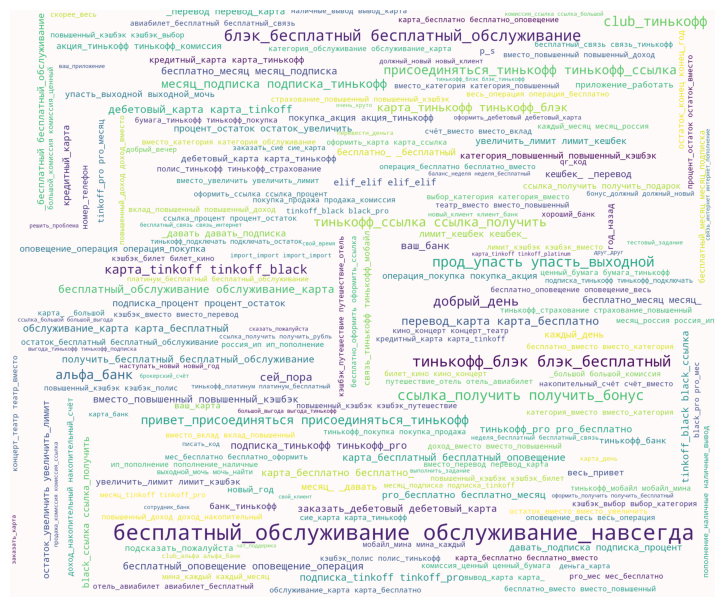

In [25]:
# Строим "облако биграмм комментариев"
import wordcloud
words_quantity = {}

def get_words():
    ret = []
    for a in bi_gram_normal_comments:
    #for a in bi_gram_posts:
        ret.append(a[0]+'_'+a[1])
    #for line in normal_posts:
    #    ret.append(line)
    return ret

def get_wordCloud(atext):
    wordCloud = wordcloud.WordCloud(background_color = 'snow',
                              width = 3000,
                              height = 2500,
                              max_words = 200,
                              random_state = 42,stopwords=russian_stopwords
                         ).generate(' '.join(atext))
    return wordCloud

words = get_words()
procWordCloud = get_wordCloud(words)
fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

<Axes: >

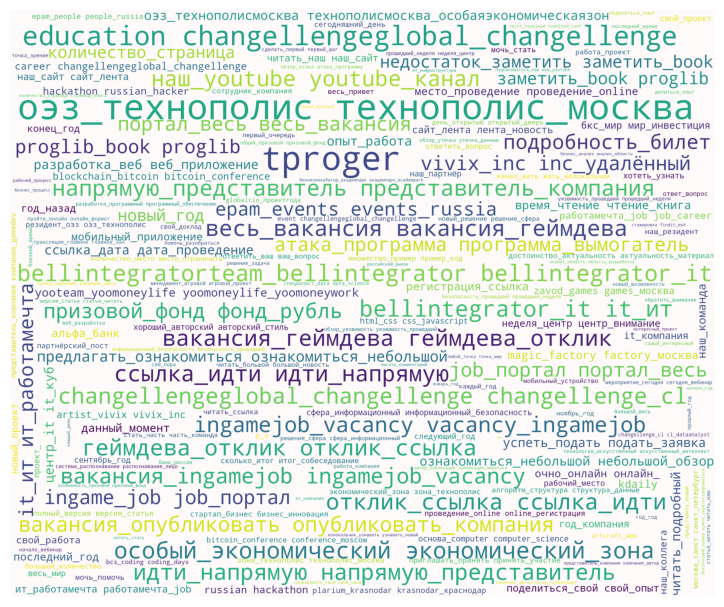

In [26]:
# Строим "облако биграмм постов"
import wordcloud
words_quantity = {}

def get_words():
    ret = []
    for a in bi_gram_normal_posts:
    #for a in bi_gram_posts:
        ret.append(a[0]+'_'+a[1])
    #for line in normal_posts:
    #    ret.append(line)
    return ret

def get_wordCloud(atext):
    wordCloud = wordcloud.WordCloud(background_color = 'snow',
                              width = 3000,
                              height = 2500,
                              max_words = 200,
                              random_state = 42,stopwords=russian_stopwords
                         ).generate(' '.join(atext))
    return wordCloud

words = get_words()
procWordCloud = get_wordCloud(words)
fig = plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.imshow(procWordCloud)
plt.axis('off')
plt.subplot(1, 2, 1)

In [27]:
bgposts = nltk.FreqDist(bi_gram_normal_posts)
bgposts.most_common(10)
# 10 популярных биграмм постов

[(('принять', 'участие'), 360),
 (('искусственный', 'интеллект'), 329),
 (('технополис', 'москва'), 310),
 (('база', 'данные'), 287),
 (('информационный', 'безопасность'), 261),
 (('оэз', 'технополис'), 259),
 (('язык', 'программирование'), 243),
 (('мастер', 'класс'), 239),
 (('подать', 'заявка'), 228),
 (('машинный', 'обучение'), 220)]

In [28]:
bgposts = nltk.FreqDist(bi_gram_posts)
bgposts.most_common(10)

[(('технополис', 'москва'), 307),
 (('оэз', 'технополис'), 259),
 (('принять', 'участие'), 220),
 (('информационной', 'безопасности'), 214),
 (('data', 'science'), 203),
 (('blockchain', 'life'), 196),
 (('it', 'academy'), 169),
 (('подать', 'заявку'), 167),
 (('нашем', 'сайте'), 163),
 (('призовой', 'фонд'), 162)]

In [29]:
bgcomments = nltk.FreqDist(bi_gram_normal_comments)
bgcomments.most_common(10)
# 10 популярных биграмм комментариев

[(('бесплатный', 'обслуживание'), 594),
 (('обслуживание', 'навсегда'), 351),
 (('карта', 'тинькофф'), 272),
 (('ссылка', 'получить'), 248),
 (('дебетовый', 'карта'), 245),
 (('тинькофф', 'блэк'), 243),
 (('кредитный', 'карта'), 214),
 (('альфа', 'банк'), 208),
 (('карта', 'tinkoff'), 179),
 (('подписка', 'тинькофф'), 161)]

In [30]:
bgcomments = nltk.FreqDist(bi_gram_comments)
bgcomments.most_common(10)

[(('бесплатное', 'обслуживание'), 295),
 (('бесплатным', 'обслуживанием'), 271),
 (('тинькофф', 'блэк'), 243),
 (('обслуживанием', 'навсегда'), 230),
 (('tinkoff', 'black'), 149),
 (('ссылке', 'получи'), 148),
 (('альфа', 'банк'), 146),
 (('блэк', 'бесплатным'), 146),
 (('добрый', 'день'), 143),
 (('бесплатно', 'месяца'), 135)]

In [31]:
#report_df.head()

In [32]:
report_df['День'] = pd.to_datetime(report_df['Дата']).dt.date
views = []
likes = []
reposts = []
comments = []
dates = sorted(set(report_df['День']))
#report_df['Дата'].apply(lambda x: x[0:10])
for date in dates:
    views.append(report_df[report_df['День'] == date]['Просмотров'].sum().astype(int))
    likes.append(report_df[report_df['День'] == date]['Лайков'].sum().astype(int))
    reposts.append(report_df[report_df['День'] == date]['Репостов'].sum().astype(int))
    comments.append(report_df[report_df['День'] == date]['Комментариев'].sum().astype(int))

In [33]:
df_future = pd.DataFrame(list(zip(dates, views, likes, reposts, comments)),
               columns =['Date', 'View', 'Like', 'Repost', 'Comment'])

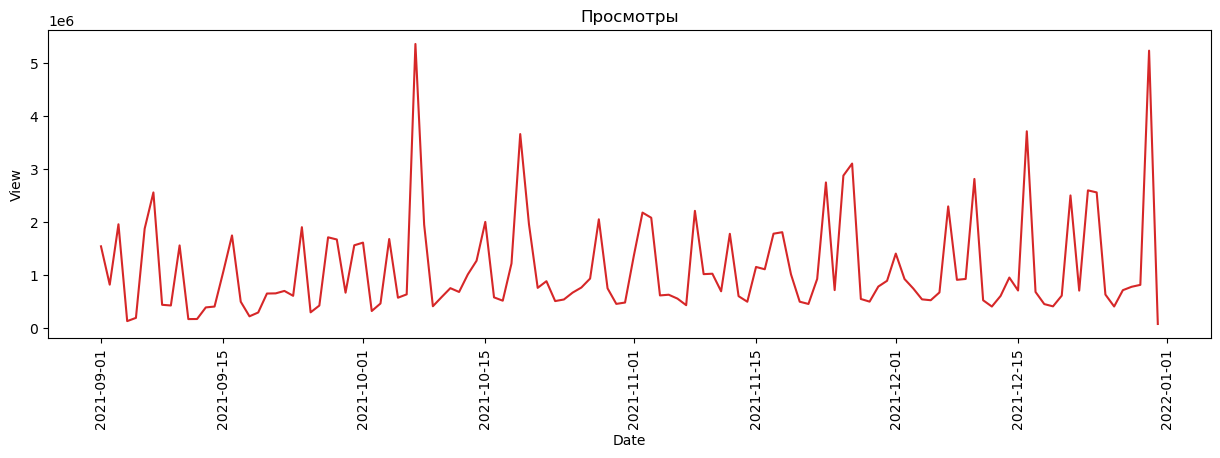

In [34]:
def plot_df(df_future, x, y, title="", xlabel='Date', ylabel='View', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.xticks(rotation=90)
    plt.show() 

plot_df(df_future, x=df_future['Date'], y=df_future['View'], title='Просмотры')

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

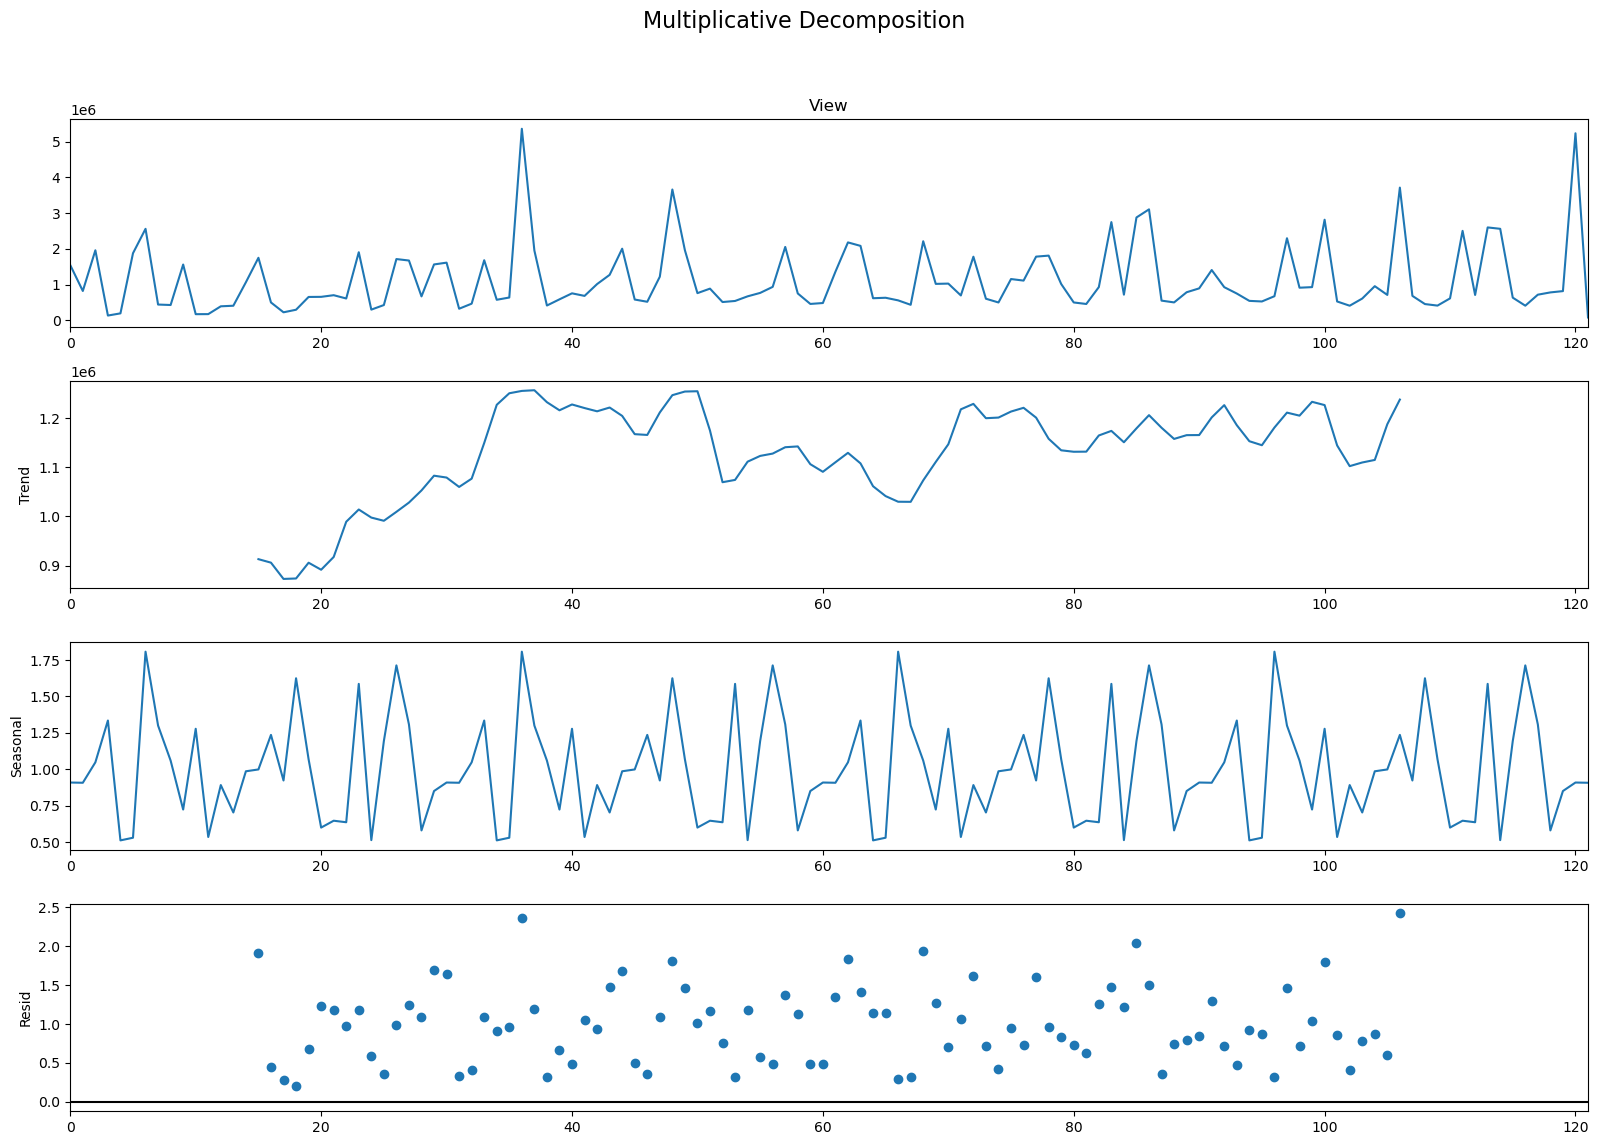

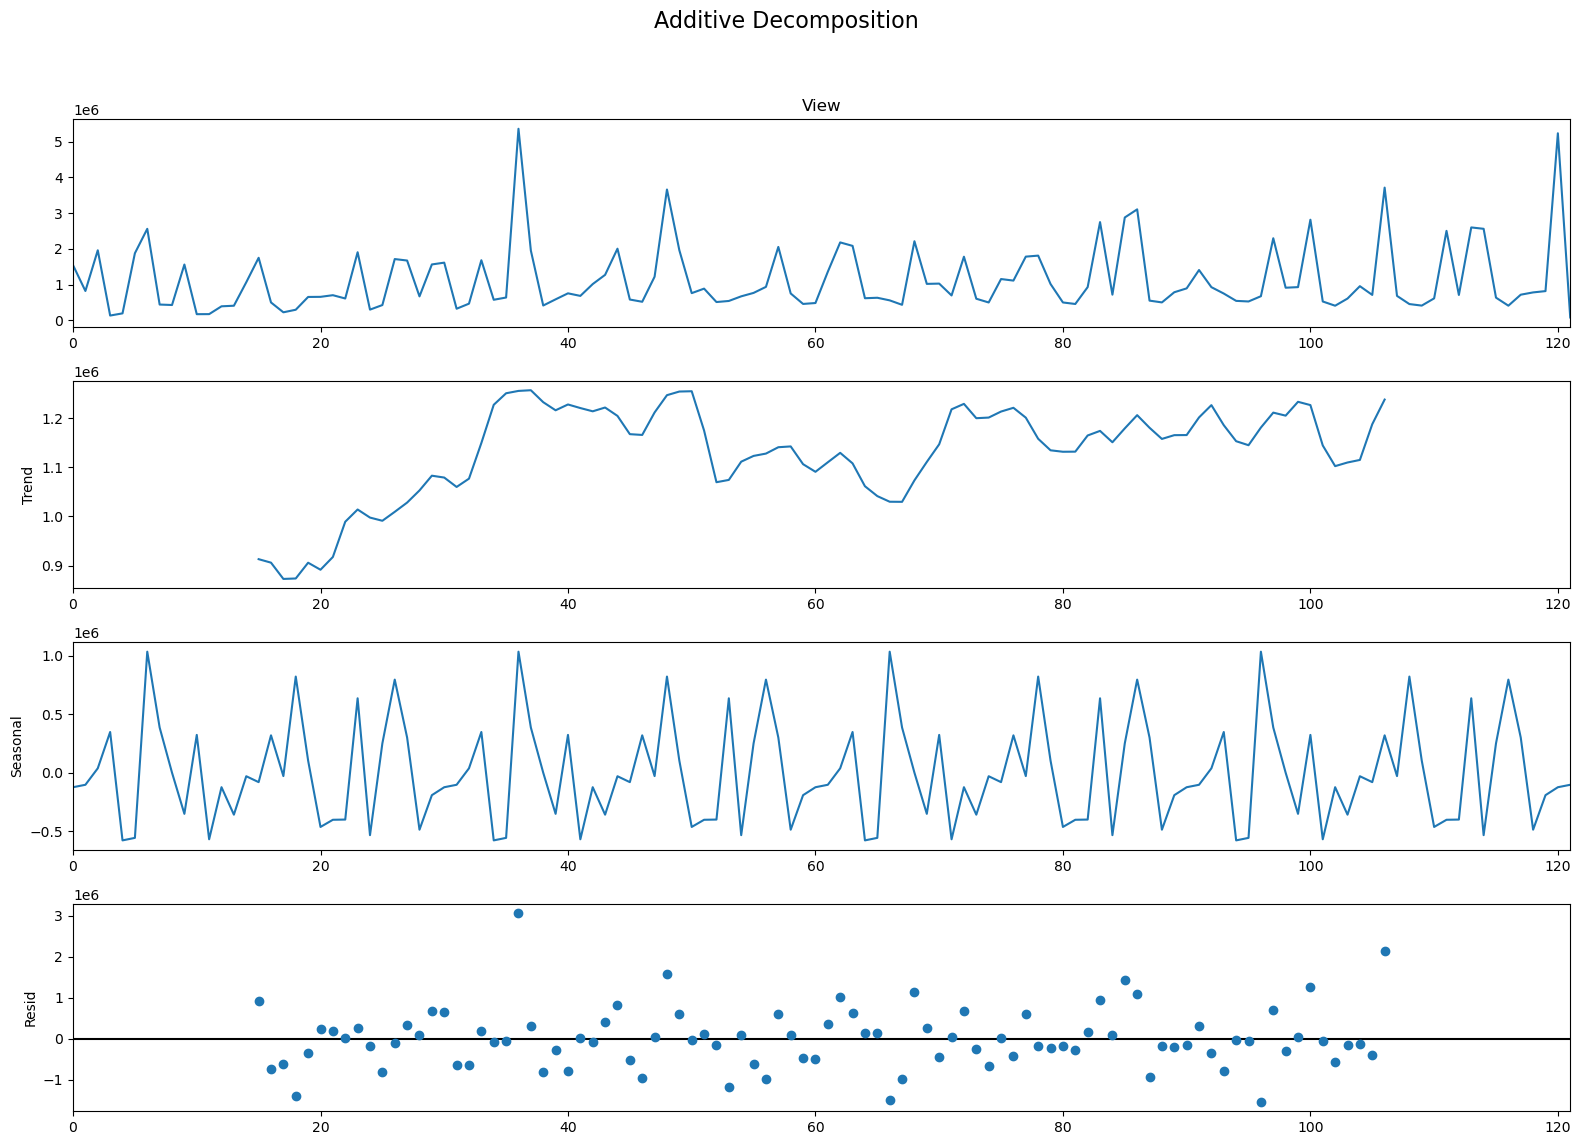

In [36]:
# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df_future['View'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df_future['View'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

In [37]:
# ADF Test
from statsmodels.tsa.stattools import adfuller
result = adfuller(np.log(df_future['View']), autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}') 

ADF Statistic: -2.4740461228365938
n_lags: 0.12191755631732404
p-value: 0.12191755631732404
Critial Values:
   1%, -3.4924012594942333
Critial Values:
   5%, -2.8886968193364835
Critial Values:
   10%, -2.5812552709190673


In [38]:
df_future_copy = df_future.copy
#df_future.isnull().sum()

In [39]:
#df_future['Date'] = pd.to_datetime(df_future['Date'])

In [40]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
#my_order = (7, 1, 7)
my_order = (9, 1, 8)
my_seasonal_order = (1, 1, 1, 12)
# define model
arima = SARIMAX(df_future['View'], order=my_order, seasonal_order=my_seasonal_order, concentrate_scale=True)
#arima = SARIMAX(df_future['View'],order=(7,0,7))
arima_results = arima.fit()
arima_value_forecast = arima_results.get_forecast(steps=31).predicted_mean
#arima_value_forecast = arima_results.get_forecast(steps=31).polynomial_seasonal_ar 

In [41]:
#SARIMAX

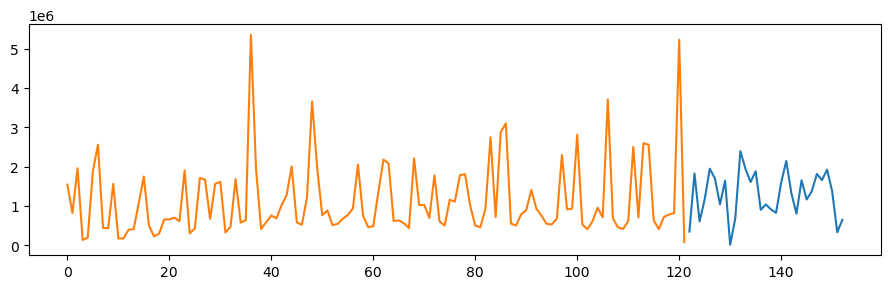

In [42]:
plt.figure(figsize=(11, 3)) # resizing the plot
plt.plot(arima_value_forecast)
plt.plot(df_future['View'])
plt.show()

In [43]:
#df_future = df_future.resample('W', views='mean')
#df_future.resample?

In [44]:
#df_future.describe()

In [45]:
#df_future.info()

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime
%matplotlib inline

In [47]:
forecast_out = int(math.ceil(0.25 * len(df_future))) # Сдвигаем данные, чтобы освободить место для прогноза
print(forecast_out)
df['label'] = df_future['View'].shift(-forecast_out) # Проверяем число дней прогноза

31


In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error

In [49]:
scaler = StandardScaler()

In [50]:
train_data = df_future

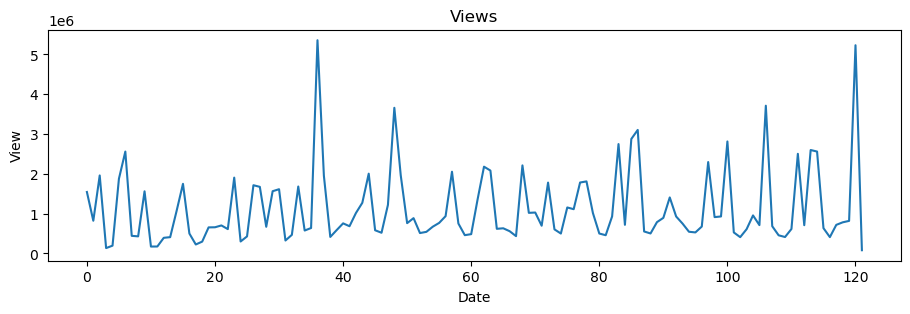

In [51]:
plt.figure(figsize=(11, 3)) # resizing the plot
train_data['View'].plot()
plt.title('Views') # adding a title
plt.xlabel('Date') # x label
plt.ylabel('View') # y label
plt.show()

In [52]:
import datetime as dt
data_df = df_future.copy()
data_df['Date'] = pd.to_datetime(data_df['Date'])
data_df['Date'] = data_df['Date'].map(dt.datetime.toordinal)

In [53]:
#data_df.dropna(inplace=True)
#df_future.set_index('Date', inplace=True)
df_future['NDate'] = pd.to_numeric(pd.to_datetime(df_future['Date']))
df_future['NDate'] = df_future['NDate']/100000000000;

In [54]:
#df_future['NDate']

In [55]:
mms = MinMaxScaler()
df_future['View Scaled'] =  mms.fit_transform(df_future[['View']])

In [56]:
#y = np.array(df_future['View'])
#X = np.array(df_future['Date'])
#df_future = df_future.set_index('Date')
X_train, X_test, y_train, y_test = train_test_split(df_future['NDate'],df_future['View Scaled'],test_size=0.2,random_state=42)

In [57]:
#df_future=df_future_copy

In [58]:
X_train= X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [59]:
#type(df_future)

Пробуем разные методы прогноза на основе наших данных.

## Linear Regression

In [60]:
#X_train.shape, y_train.shape
#X_train = X_train.transpose()
#y_train = y_train.transpose()
#X_test = X_test.transpose()
#y_test = y_test.transpose()

In [61]:
#X_train.shape, X_test.shape

In [62]:
lr = LinearRegression()
#X_train = np.stack(X_train)#.reshape(1, -1))
#y_train = y_train.astype(int)
lr.fit(X_train, y_train)

LinearRegression()

In [63]:
#kernel : {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}

In [64]:
#X_train

In [65]:
y_pred=lr.predict(X_test)

In [66]:
np.stack(df_future['View']).shape

(122,)

In [67]:
lr_confidence = lr.score(X_test, y_test)

In [68]:
#sorted(data_df.values())

In [69]:
np.exp(lr_confidence)

0.6142296013181386

## Random Forest

In [70]:
#X_train[:5]

In [71]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train.ravel())

RandomForestRegressor()

In [72]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train.ravel())
rf_confidence = rf.score(X_test, y_test.ravel())

In [73]:
np.exp(rf_confidence)

0.36915108940376545

In [74]:
#rf.predict(X_test)

In [75]:
#y_test[:10]

## Ridge

In [76]:
rg = Ridge()
rg.fit(X_train, y_train)

Ridge()

In [77]:
rg_confidence = rg.score(X_test, y_test)

In [78]:
np.exp(rg_confidence)

0.6142296013182152

## SVR (LinearSVR, SGDRegressor)

In [79]:
svr=SVR()
svr.fit(X_train, y_train.ravel())

SVR()

In [80]:
svr_confidence = svr.score(X_test, y_test.ravel())

In [81]:
np.exp(svr_confidence)

0.8001407320892482

In [82]:
y_pred=svr.predict(X_test)

In [83]:
#svr?

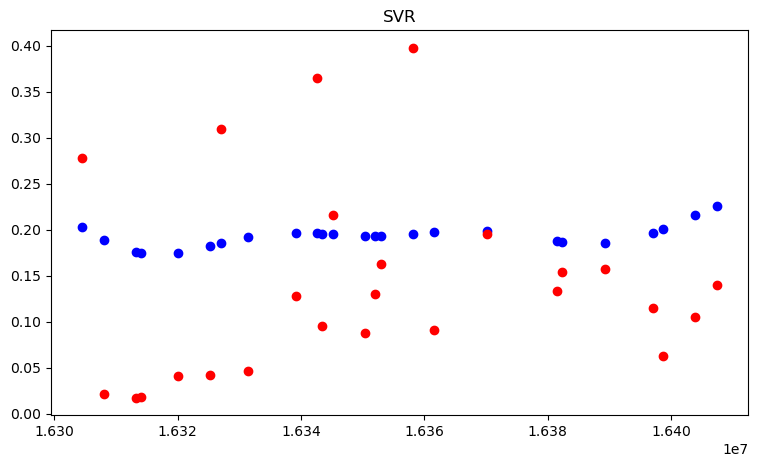

In [84]:
if max(y_test) >= max(y_pred):
    my_range = int(max(y_test))
else:
    my_range = int(max(y_pred))
plt.figure(figsize=(9, 5)) # resizing the plot
plt.scatter(X_test, y_pred, color='blue')
plt.scatter(X_test, y_test, color='red')
#plt.plot(range(my_range), range(my_range), 'o')
plt.title('SVR')
plt.show()

При помощи методов множественной регрессии не удалось получить сколько-нибудь значимых результатов, т.к. точность всех применённых методов оказалась низкой (не более 80%).<br>
Использовались методы:<list>
<li>линейная регрессия;</li>
<li>случайный лес;</li>
<li>ридж регрессия;</li>
<li>лассо регрессия;</li>
<li>метод опорных векторов;</li>
<li>линейный метод опорных векторов;</li>
<li>стохастический градиентный спуск.</li>
</list>